# 实验3.1 利用DFT对模拟信号进行频谱分析

## 基本信息

- 实验类型：分析型
- 实验地点：分散
- 实验时间：第9-10周

## 目标

对一个未知参数的信号进行频谱分析，掌握使用DFT进行频谱分析的方法。

## 内容

- 调用教师提供的 `sourceAD` 程序，对未知参数信号在一定频率下进行采样，获得采样序列。
  - 程序已经包含原始信号发生器和AD转换功能。
  - 程序只能够输出有限个采样值，具体数量和输出格式，请自行查看程序的帮助。
- 利用Numpy中的FFT相关函数，计算采样序列的DFT频谱。
- 分析DFT频谱，推算原始信号中所有重要频率成分及其相关参数。
  - 相关参数包括：物理频率 $f$、幅度 $A$、相位 $\phi$。
  - 提示1：可以反复使用不同采样频率，获得不同采样序列和频谱进行分析，从而得出较高精度的参数。
  - 提示2：原始信号中，可能存在不只一个重要（幅度明显比较大的）的频率成分，且相互之间一般有一定的频率间隔。
- 实验报告直接在本`ipynb`文档中完成。
  - 调用教师提供的 `sourceAD` 程序部分，只需要在本文档中以文字方式描述过程即可，不需要屏幕截图等。
  - 提交前，请整理好本文档内容，删除所有多余的代码、无用的中间结果等，确保只保留必要的报告内容。


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

def plotVertical(title, plotData):
    """
        Parameters:
        title: plot title string
        plotData: tuple array, contains data to plot
        [(seq, noff, label), ...]
    """
    # Get the row number
    row = len(plotData)
    # Create a plot, which plots data sequence vertically, shares the same X and Y axis
    _, axe = plt.subplots(row, 1, sharex=False, sharey=False)
    axe[0].set_title(title)
    for i in range(row):
        # Get the arguments
        seq, offset, label = plotData[i]
        # Create a stem plot for seq
        axe[i].stem(seq_n(seq, offset), seq)
        # Set Y label
        axe[i].set_ylabel(label)
    # Set X label at the bottom
    axe[-1].set_xlabel('n')

C:\Users\14491\AppData\Local\Temp/ipykernel_14160/3549879323.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axe = plt.subplots(row, 1, sharex=False, sharey=False)


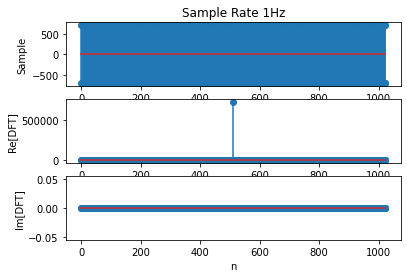

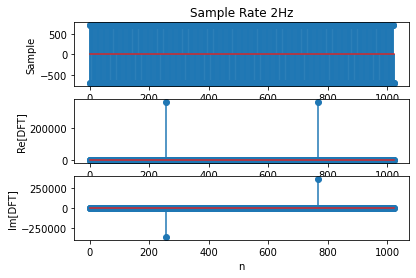

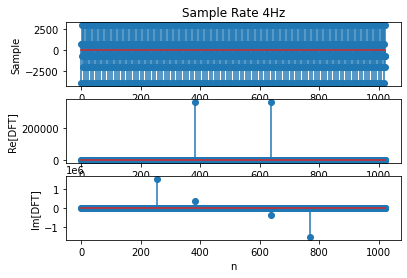

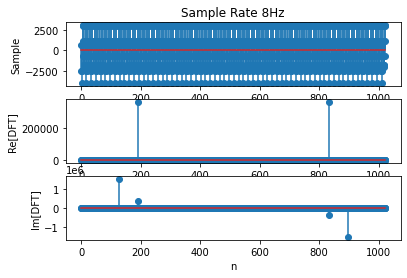

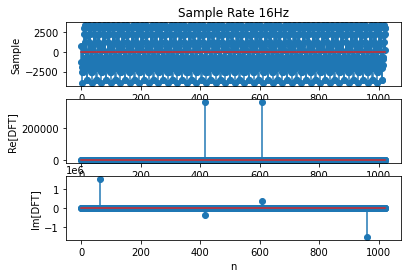

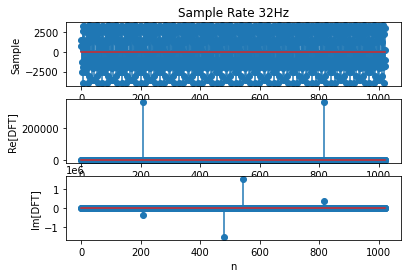

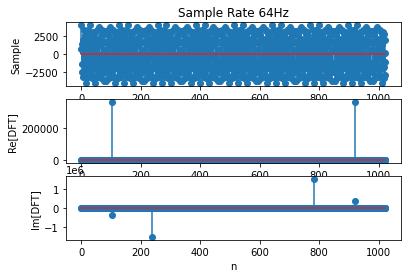

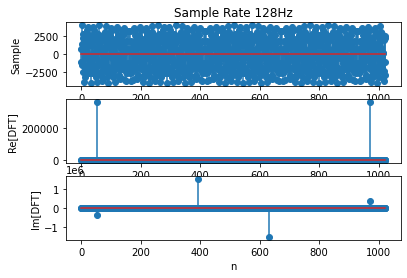

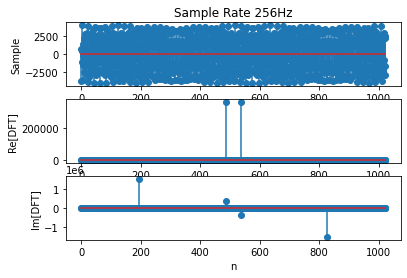

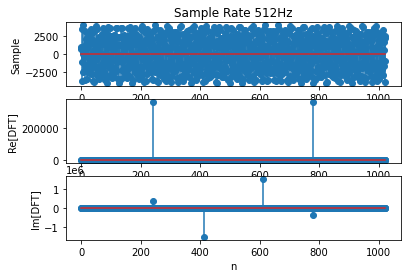

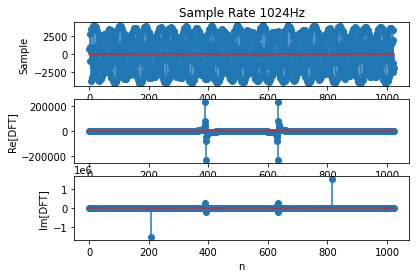

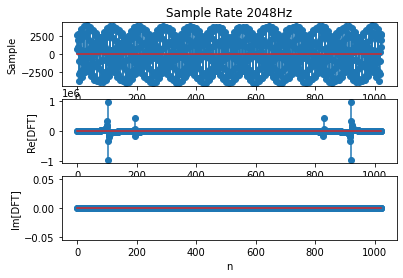

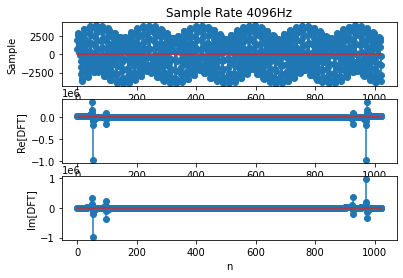

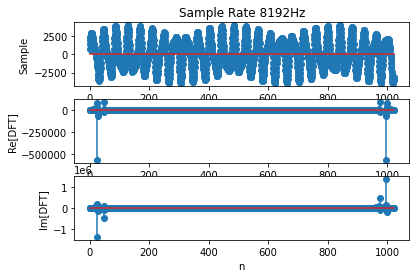

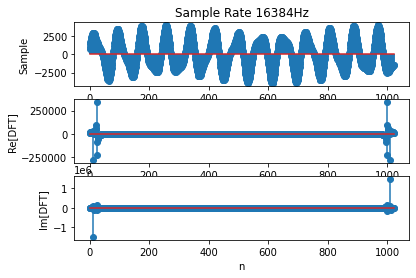

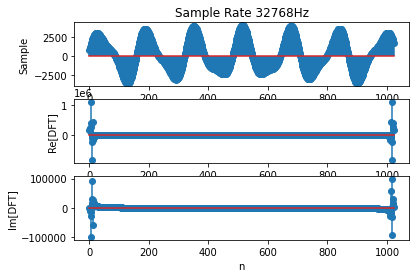

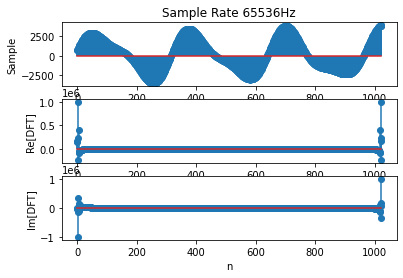

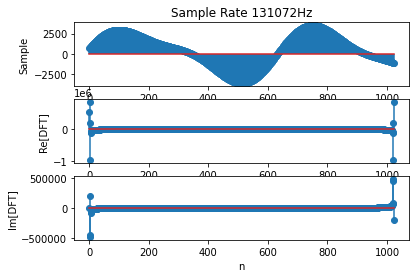

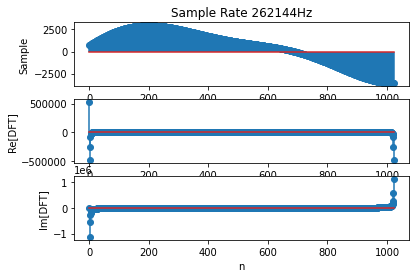

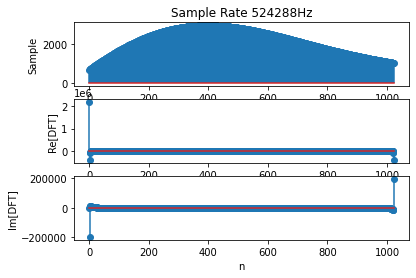

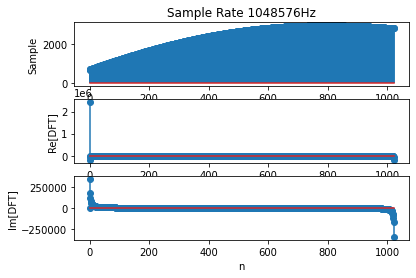

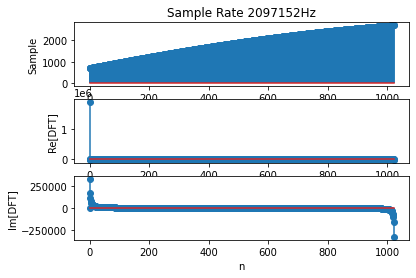

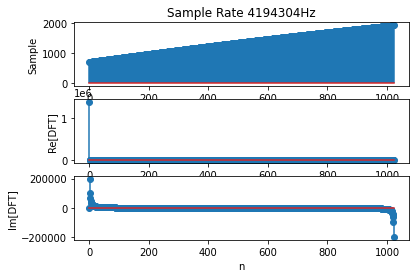

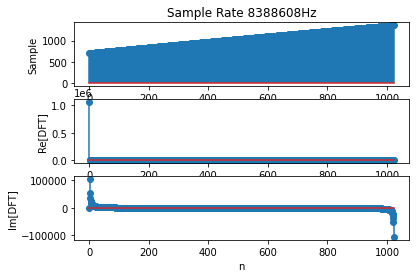

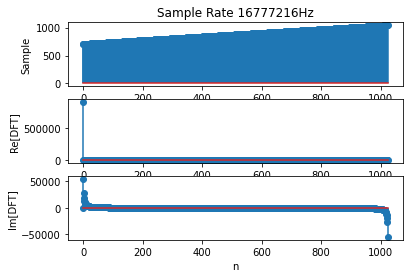

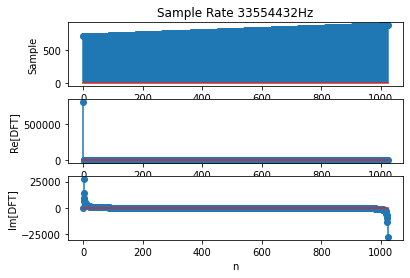

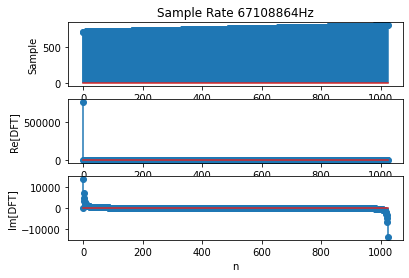

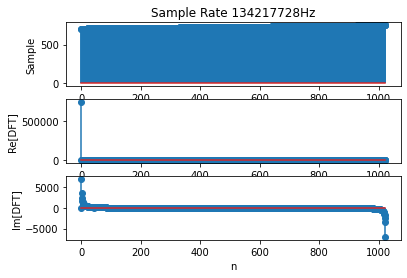

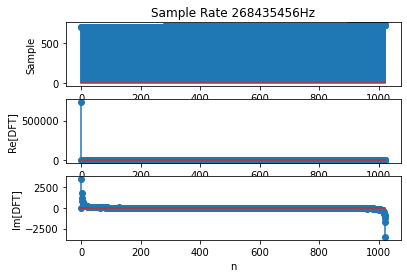

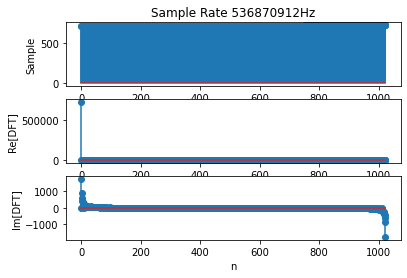

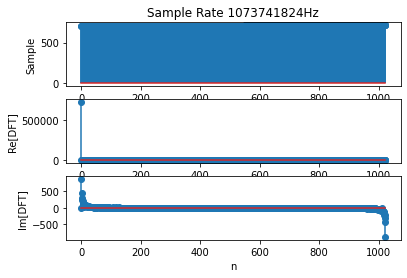

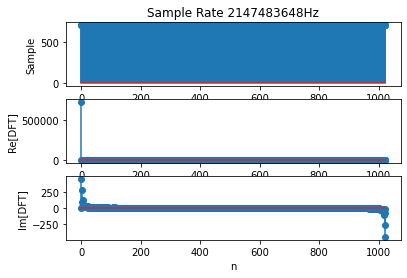

In [24]:

def sample(freq):
    """
    Sample data from source
    :param freq Sample frequency:int
    :retrun Sampled data:np.array
    """
    import subprocess
    subprocess.run(['sourceAD', str(freq), 'sampled.dat'])
    return np.fromfile('sampled.dat', dtype='int16')


def plotSample(freq, sample_data, fft_data):
    """
    Plot sampled data and its DFT data
    :param freq Sample frequency:int
    :param sample_data Sampled data:np.array
    :param fft_data DFT result of sample_data
    :return None
    """
    plotVertical(
        f'Sample Rate {freq}Hz',
        [
            (sample_data, 0, 'Sample'),
            (fft_data.real, 0, 'Re[DFT]'),
            (fft_data.imag, 0, 'Im[DFT]')
        ]
    )


for exp in range(0, 32):
    hz = 2**exp
    sample_data = sample(hz)
    fft_data = np.fft.fft(sample_data)
    # Check if fft result not all zero
    if fft_data.any():
        plotSample(hz, sample_data, fft_data)
